In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

In [4]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint

In [5]:
#this tells me what files are in the directory 
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# File to Load
homelesscount_data = 'homeless_count2018.csv'
clean_census_data = 'clean_census_data.csv'
bedcount_data = 'HIC_bedcount.csv'

In [7]:
# Reading the homeless_count2018 Data
homelesscount_data_df = pd.read_csv(homelesscount_data)
clean_census_data_df = pd.read_csv(clean_census_data)
bedcount_data_df = pd.read_csv(bedcount_data)

In [8]:
# Combining the data into a single dataset
combined_census_homelesscount_df = pd.merge(clean_census_data_df, homelesscount_data_df, on='State')

combined_census_homelesscount_df.head()

combined_census_homelesscount_bed_df = pd.merge(combined_census_homelesscount_df, bedcount_data_df, on= 'State')

combined_census_homelesscount_bed_df.head()

,State,NAME,POP_ESTIMATE_2018,Number of CoCs,"Overall Homeless, 2018","Sheltered ES Homeless, 2018","Sheltered TH Homeless, 2018","Sheltered SH Homeless, 2018","Sheltered Total Homeless, 2018","Unsheltered Homeless, 2018",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,NE,Northeast Region,56111079,3,"2,421","1,736",541,0,"2,277",144,...,273,273,114,41.76%,28,75,198,0,51,0
1,NE,Nebraska,1929268,3,"2,421","1,736",541,0,"2,277",144,...,273,273,114,41.76%,28,75,198,0,51,0
2,AL,Alabama,4887871,8,"3,434","1,519",865,40,"2,424","1,010",...,0,0,0,0.00%,0,0,0,0,0,0
3,AK,Alaska,737438,2,"2,016","1,248",459,0,"1,707",309,...,71,71,71,100.00%,0,0,71,0,0,0
4,AZ,Arizona,7171646,3,"9,865","3,615","2,144",40,"5,799","4,066",...,1086,1086,1086,100.00%,259,901,185,0,29,10


In [9]:
# Set new index to name
df = combined_census_homelesscount_bed_df.set_index("NAME")
df.head()

,State,POP_ESTIMATE_2018,Number of CoCs,"Overall Homeless, 2018","Sheltered ES Homeless, 2018","Sheltered TH Homeless, 2018","Sheltered SH Homeless, 2018","Sheltered Total Homeless, 2018","Unsheltered Homeless, 2018","Homeless Individuals, 2018",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
NAME,,,,,,,,,,,,,,,,,,,,,
Northeast Region,NE,56111079,3,"2,421","1,736",541,0,"2,277",144,"1,745",...,273,273,114,41.76%,28,75,198,0,51,0
Nebraska,NE,1929268,3,"2,421","1,736",541,0,"2,277",144,"1,745",...,273,273,114,41.76%,28,75,198,0,51,0
Alabama,AL,4887871,8,"3,434","1,519",865,40,"2,424","1,010","2,570",...,0,0,0,0.00%,0,0,0,0,0,0
Alaska,AK,737438,2,"2,016","1,248",459,0,"1,707",309,"1,434",...,71,71,71,100.00%,0,0,71,0,0,0
Arizona,AZ,7171646,3,"9,865","3,615","2,144",40,"5,799","4,066","7,259",...,1086,1086,1086,100.00%,259,901,185,0,29,10


In [10]:
# Organizing the columns for a chart of # of beds for homeless individuals and # of homeless individuals
organizedcolumns_df = df[["Homeless Individuals, 2018", "Total Year-Round Beds (ES, TH, SH)"]]

organizedcolumns_df.head()

,"Homeless Individuals, 2018","Total Year-Round Beds (ES, TH, SH)"
NAME,,
Northeast Region,"1,745",2390
Nebraska,"1,745",2390
Alabama,"2,570",3188
Alaska,"1,434",1940
Arizona,"7,259",6683


In [11]:
# Using .rename(columns={}) in order to rename columns
organizedcolumnsrenamed_df = organizedcolumns_df.rename(columns={"Total Year-Round Beds (ES, TH, SH)":"Homeless Beds", "Homeless Individuals, 2018":"Homeless Individuals"})
organizedcolumnsrenamed_df.head()

,Homeless Individuals,Homeless Beds
NAME,,
Northeast Region,"1,745",2390
Nebraska,"1,745",2390
Alabama,"2,570",3188
Alaska,"1,434",1940
Arizona,"7,259",6683


In [12]:
organizedcolumnsrenamed_df = organizedcolumnsrenamed_df.drop(["Northeast Region"], axis=0)
organizedcolumnsrenamed_df

,Homeless Individuals,Homeless Beds
NAME,,
Nebraska,"1,745",2390
Alabama,"2,570",3188
Alaska,"1,434",1940
Arizona,"7,259",6683
Arkansas,"2,280",2362
California,"109,008",43548
Colorado,"7,607",7532
Connecticut,"2,280",3417
Delaware,708,1122


In [13]:
organizedcolumnsrenamed_df['Homeless Individuals'] = organizedcolumnsrenamed_df['Homeless Individuals'].str.replace(',','')
organizedcolumnsrenamed_df

,Homeless Individuals,Homeless Beds
NAME,,
Nebraska,1745,2390
Alabama,2570,3188
Alaska,1434,1940
Arizona,7259,6683
Arkansas,2280,2362
California,109008,43548
Colorado,7607,7532
Connecticut,2280,3417
Delaware,708,1122


In [14]:
organizedcolumnsrenamed_df['Homeless Individuals'].astype('int')

NAME
Nebraska                  1745
Alabama                   2570
Alaska                    1434
Arizona                   7259
Arkansas                  2280
California              109008
Colorado                  7607
Connecticut               2280
Delaware                   708
District of Columbia      3770
Florida                  21443
Georgia                   6943
Hawaii                    4131
Idaho                     1297
Illinois                  6752
Indiana                   3776
Iowa                      1711
Kansas                    1443
Kentucky                  2735
Louisiana                 2540
Maine                     1450
Maryland                  4914
Massachusetts             6811
Michigan                  5209
Minnesota                 3993
Mississippi               1024
Missouri                  3776
Montana                    983
Nevada                    7058
New Hampshire              835
New Jersey                6048
New Mexico                1949
New

In [15]:
# Sorting the DataFrame based on "Pop_2018" column
# To sort from highest to lowest, ascending=False must be passed in
#Homelessbeds_df = organizedcolumnsrenamed_df.sort_values("Pop_2018",ascending=False)
#top_df.head(10)

homelessbeds_df = organizedcolumnsrenamed_df.iloc[[5,10,14,32]]
homelessbeds_df


,Homeless Individuals,Homeless Beds
NAME,,
California,109008,43548
Florida,21443,19554
Illinois,6752,10210
New York,39827,88063


In [16]:
homelessbeds_df['Homeless Individuals']= homelessbeds_df['Homeless Individuals'].astype(int)

C:\Users\chidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
homelessbeds_df.dtypes

Homeless Individuals    int32
Homeless Beds           int64
dtype: object

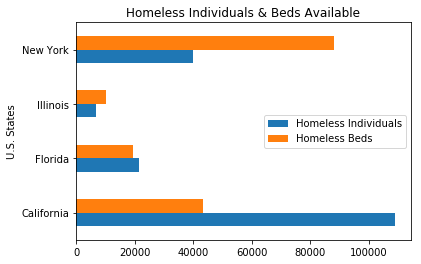

In [18]:
#homelessbeds_df = homelessbeds_df.plot(kind='line', figsize=(8,8), linewidth=2, marker="^", xlim())


#plt.show()

# Give our graph axis labels
#plt.title("Homeless Individuals & Beds Available")
#plt.margins(x=0.2)
#plt.xticks(rotation=45)
#plt.ylim(0, 1)
#plt.xlim(1, 1)
#top_ten_pop_df.dtypes
homelessbeds_df.plot.barh()
plt.ylabel("U.S. States")
plt.title("Homeless Individuals & Beds Available")
plt.show()

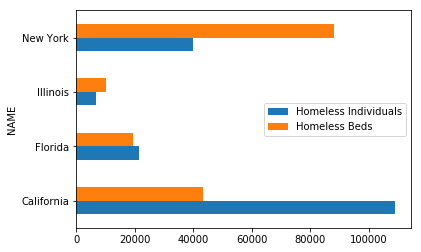

In [19]:
ax = homelessbeds_df.plot.barh()
fig = ax.get_figure()
fig.savefig("../project1_data/individuals&beds.png")


#plt.tight_layout()
#plt.savefig("../project1_data/top_ten_chart.png")
#plt.show()

#plt.get.savefig('individuals&beds.png')

In [20]:
# Organizing the columns for a chart of # of beds for homeless families and # of homeless families by state
organizedcolumnsfam_df = df[["Homeless People in Families, 2018", "Total Beds for Households with Children (ES, TH, SH)"]]

organizedcolumnsfam_df.head()

,"Homeless People in Families, 2018","Total Beds for Households with Children (ES, TH, SH)"
NAME,,
Northeast Region,676,906
Nebraska,676,906
Alabama,864,1121
Alaska,582,709
Arizona,"2,606",3097


In [21]:
organizedcolumnsfam_df['Homeless People in Families, 2018'] = organizedcolumnsfam_df['Homeless People in Families, 2018'].str.replace(',','')
organizedcolumnsfam_df

C:\Users\chidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,"Homeless People in Families, 2018","Total Beds for Households with Children (ES, TH, SH)"
NAME,,
Northeast Region,676,906
Nebraska,676,906
Alabama,864,1121
Alaska,582,709
Arizona,2606,3097
Arkansas,432,930
California,20964,20278
Colorado,3250,3337
Connecticut,1696,1831


In [44]:
organizedcolumnsfam_df = organizedcolumnsfam_df.rename(columns={"Homeless People in Families, 2018":"Homeless People in Families", "Total Beds for Households with Children (ES, TH, SH)":"Beds for Families w/Kids"})
organizedcolumnsfam_df.head()

,Homeless People in Families,Beds for Families w/Kids
NAME,,
Northeast Region,676,906
Nebraska,676,906
Alabama,864,1121
Alaska,582,709
Arizona,2606,3097


In [45]:
homelessfambeds_df = organizedcolumnsfam_df.iloc[[6,11,15,33]]
homelessfambeds_df

,Homeless People in Families,Beds for Families w/Kids
NAME,,
California,20964,20278
Florida,9587,8312
Illinois,3891,4780
New York,52070,52896


In [46]:
homelessfambeds_df['Homeless People in Families']= homelessfambeds_df['Homeless People in Families'].astype(int)
homelessfambeds_df.dtypes

C:\Users\chidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Homeless People in Families    int32
Beds for Families w/Kids       int64
dtype: object

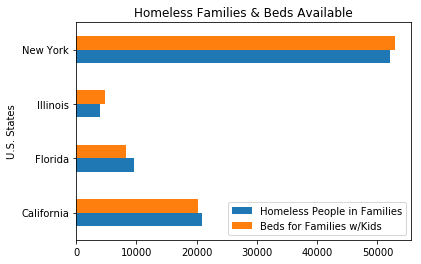

In [47]:
homelessfambeds_df.plot.barh()
plt.ylabel("U.S. States")
plt.title("Homeless Families & Beds Available")
plt.show()

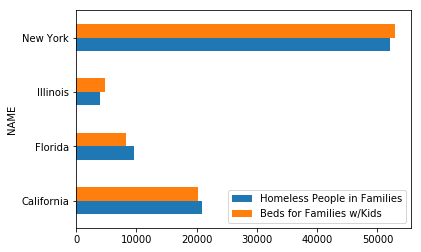

In [48]:
ax = homelessfambeds_df.plot.barh()
fig = ax.get_figure()
fig.savefig("../project1_data/Families&beds.png")

In [49]:
# Organizing the columns for a chart of # of beds for homeless individuals and # of homeless individuals
organizedcolumnsUSpop_df = df[["POP_ESTIMATE_2018", "Overall Homeless, 2018"]]

organizedcolumnsUSpop_df.head()

,POP_ESTIMATE_2018,"Overall Homeless, 2018"
NAME,,
Northeast Region,56111079,"2,421"
Nebraska,1929268,"2,421"
Alabama,4887871,"3,434"
Alaska,737438,"2,016"
Arizona,7171646,"9,865"


In [50]:
organizedcolumnsUSpop_df['Overall Homeless, 2018'] = organizedcolumnsUSpop_df['Overall Homeless, 2018'].str.replace(',','')
organizedcolumnsUSpop_df

C:\Users\chidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,POP_ESTIMATE_2018,"Overall Homeless, 2018"
NAME,,
Northeast Region,56111079,2421
Nebraska,1929268,2421
Alabama,4887871,3434
Alaska,737438,2016
Arizona,7171646,9865
Arkansas,3013825,2712
California,39557045,129972
Colorado,5695564,10857
Connecticut,3572665,3976


In [51]:
organizedcolumnsUSpop_df = organizedcolumnsUSpop_df.rename(columns={"POP_ESTIMATE_2018":"US Population", "Overall Homeless, 2018":"Homeless Population"})
organizedcolumnsUSpop_df.head()

,US Population,Homeless Population
NAME,,
Northeast Region,56111079,2421
Nebraska,1929268,2421
Alabama,4887871,3434
Alaska,737438,2016
Arizona,7171646,9865


In [52]:
organizedcolumnsUSpop_df['US Population']= organizedcolumnsUSpop_df['US Population'].astype(int)
organizedcolumnsUSpop_df['Homeless Population']= organizedcolumnsUSpop_df['Homeless Population'].astype(int)

In [53]:
organizedcolumnsUSpop_df.dtypes

US Population          int32
Homeless Population    int32
dtype: object

In [54]:
organizedcolumnsUSpop_df = organizedcolumnsUSpop_df.drop(["Northeast Region"], axis=0)
organizedcolumnsUSpop_df

,US Population,Homeless Population
NAME,,
Nebraska,1929268,2421
Alabama,4887871,3434
Alaska,737438,2016
Arizona,7171646,9865
Arkansas,3013825,2712
California,39557045,129972
Colorado,5695564,10857
Connecticut,3572665,3976
Delaware,967171,1082


In [55]:
bottom_df = organizedcolumnsUSpop_df.sort_values("US Population")
bottom_df.head(11)

,US Population,Homeless Population
NAME,,
Wyoming,577737,639
Vermont,626299,1291
District of Columbia,702455,6904
Alaska,737438,2016
North Dakota,760077,542
South Dakota,882235,1159
Delaware,967171,1082
Rhode Island,1057315,1101
Montana,1062305,1405


In [135]:
bottom_df = bottom_df.loc[(bottom_df["US Population"] <= 1350000)]
bottom_df.head(12)

,US Population,Homeless Population
NAME,,
Wyoming,577737,639
Vermont,626299,1291
District of Columbia,702455,6904
Alaska,737438,2016
North Dakota,760077,542
South Dakota,882235,1159
Delaware,967171,1082
Rhode Island,1057315,1101
Montana,1062305,1405


In [136]:
#bottom_df.plot.bar()
#plt.ylabel("States w/Lowest Population Rate")
#plt.title("U.S. States with Lowest Population Rate")

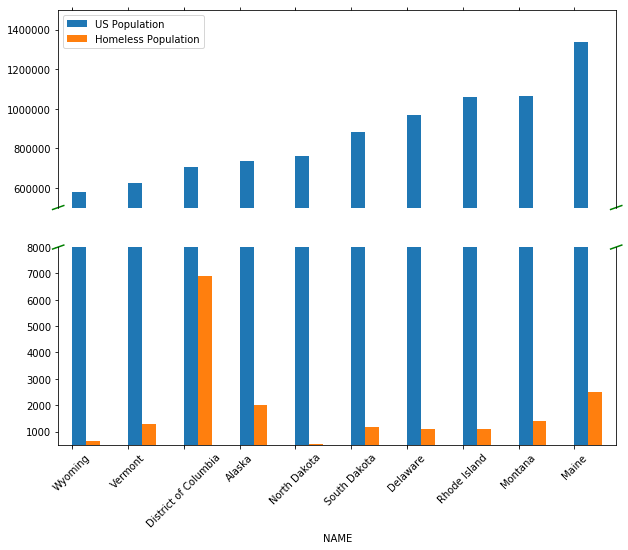

In [137]:
f, axis = plt.subplots(2, 1, sharex=True)
bottom_df.plot(kind='bar', ax=axis[0], width=0.5, position=0, figsize=(10,8))
bottom_df.plot(kind='bar', ax=axis[1], width=0.5, position=0, figsize=(10,8))
axis[0].set_ylim(500000, 1500000)
axis[1].set_ylim(500, 8000)
axis[1].legend().set_visible(False)

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()
d = .01
kwargs = dict(transform=axis[0].transAxes, color='g', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)

plt.xticks(rotation=45)

#plt.subplots_adjust(left=0.125, bottom=0.4, right=0.9, top=0.9, wspace=0.8, hspace=0.5)
#ax = bottom_df.plot.bar()
fig = ax.get_figure()
fig.savefig("../project1_data/Gen&HomelessPop.png")

plt.show()


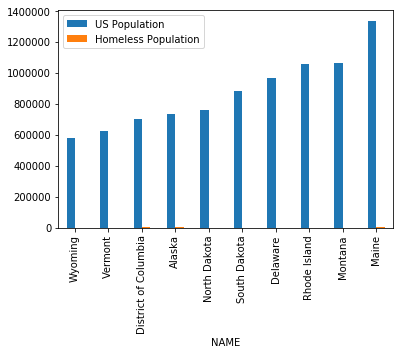

In [127]:
ax = bottom_df.plot.bar()
fig = ax.get_figure()
fig.savefig("../project1_data/Gen&HomelessPop.png")

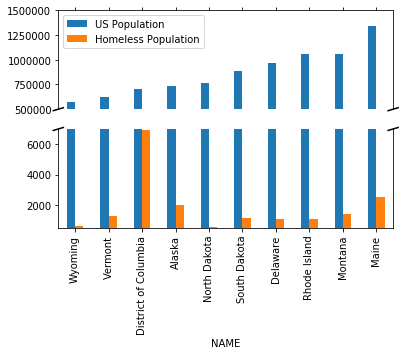

In [121]:
f, axis = plt.subplots(2, 1, sharex=True)
bottom_df.plot(kind='bar', ax=axis[0])
bottom_df.plot(kind='bar', ax=axis[1])
axis[0].set_ylim(500000, 1500000)
axis[1].set_ylim(500, 7000)
axis[1].legend().set_visible(False)

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()
d = .015
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)
plt.show()

In [57]:
# Plot the top 10 US states population as a line chart
top_ten.plot('Pop_2018', color="blue", label="Top Ten US Pop" )

# Plot the homeless population in those top 10 states as a line chart
top_ten.plot('Homeless_Pop_2018', color="green", label="Top Ten Homeless Pop")

# Create a legend for our chart
#plt.legend(handles=[top_ten, homeless_pop], loc="best")

# Show the chart
plt.show()

AttributeError: 'list' object has no attribute 'plot'

In [39]:
# Will sort from lowest to highest if no other parameter is passed
bottom_df = renamed_df.sort_values("Pop_2018")
bottom_df.head(10)

,Pop_2018,Homeless_Pop_2018
NAME,,
Wyoming,577737,639
Vermont,626299,1291
District of Columbia,702455,6904
Alaska,737438,2016
North Dakota,760077,542
South Dakota,882235,1159
Delaware,967171,1082
Rhode Island,1057315,1101
Montana,1062305,1405


In [44]:
bottom_ten = top_df.loc[(top_df["Pop_2018"] <= 1350000)]
bottom_ten.head(12)

,Pop_2018,Homeless_Pop_2018
NAME,,
Maine,1338404,2516
Montana,1062305,1405
Rhode Island,1057315,1101
Delaware,967171,1082
South Dakota,882235,1159
North Dakota,760077,542
Alaska,737438,2016
District of Columbia,702455,6904
Vermont,626299,1291


In [ ]:
# Labels for the sections of our pie chart 
labels = ["Veterans", "Unaccompanied Minors Under 18", "Families"]

# The values of each section of the pie chart
sizes = [#, #, #, #]

# The colors of each section of the pie chart
colors = [" ", " ", " ", " "]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

In [ ]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")